# Consider the dataset comprising of 109 cricket players (attached here with assignment), filename is ‘cricketers.csv’. Each row comprises of following details of a cricketer:
matches_played: number of matches played by the player, 
innings_batted: number of times got the chance to bat,
runs_scored: total runs scores across all innings,
highest_runs: highest run scored taking all innings in account,
ball_faced: total balls faced across all innings,
average_runs: average runs scores taking all innings in account, 
strike_rate: it is computed as (runs_scored / balls_faced) x 100,
innings_bowled: number of times got the chance to bowl,
overs: number of overs bowled across all innings,
runs_given: total run given across all innings,
wickets_obtained: total wickets obtained across all innings,
average_runs_per_wicket: it is computed as (runs_given / wickets_obtained)
bowling_economy: average runs scored per overred per overred per over

In [93]:
# Importing required packages
import numpy as np
import pandas as pd
import warnings as war
war.filterwarnings("ignore")

In [94]:
# Defining dataset csv Path
dataSetPath="C:\\Users\\ASUS\\jupyterworkspace\\Assignment & Mini Project\Module_04_Unsupervised Learning and Association Rule Mining\\Assigments\\cricketers.csv"
# Loading dataSet
dataSetRead=pd.read_csv(dataSetPath)

In [95]:
# Displaying first 5 records to confirming data loading
print("*****************************************************Displaying below first 5 records**********************************************************")
dataSetRead.head()

*****************************************************Displaying below first 5 records**********************************************************


,PLAYER,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
0,Aaron Finch,10,9,134,46,100,16.75,144.00,0,0.0,0,0,0.0,0.0
1,AB de Villiers,12,11,480,90,275,53.33,174.54,0,0.0,0,0,0.0,0.0
2,Abhishek Sharma,3,3,63,46,33,63.00,190.90,0,0.0,0,0,0.0,0.0
3,Ajinkya Rahane,15,14,370,65,313,28.46,118.21,0,0.0,0,0,0.0,0.0
4,Alex Hales,6,6,148,45,118,24.66,125.42,0,0.0,0,0,0.0,0.0


In [96]:
# Displaying last 5 records to confirming data loading
print("*****************************************************Displaying below last 5 records**********************************************************")
dataSetRead.tail()

*****************************************************Displaying below last 5 records**********************************************************


,PLAYER,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
104,Anureet Singh,0,0,0,0,0,0.0,0.0,3,4.0,42,1,42.00,10.50
105,Avesh Khan,0,0,0,0,0,0.0,0.0,6,19.0,204,4,51.00,10.73
106,Barinder Sran,0,0,0,0,0,0.0,0.0,6,22.0,229,4,57.25,10.40
107,Basil Thampi,0,0,0,0,0,0.0,0.0,4,10.1,114,5,22.80,10.20
108,Ben Laughlin,0,0,0,0,0,0.0,0.0,7,21.0,212,9,22.44,10.04


In [97]:
# Displaying dimension of dataSet
print("Dimention of Dataset:- {}".format(dataSetRead.shape[0:2]))
print("Total number of rows in Dataset:- {}".format(dataSetRead.shape[0]))
print("Total number of columns in Dataset:- {}".format(dataSetRead.shape[1]))

Dimention of Dataset:- (109, 14)
Total number of rows in Dataset:- 109
Total number of columns in Dataset:- 14


In [98]:
# Displaying description & statistcal summary of the dataSet
dataSetRead.describe().T

,count,mean,std,min,25%,50%,75%,max
matches_played,109.0,9.559633,5.161164,0.0,5.00,10.00,14.00,17.00
innings_batted,109.0,7.889908,4.982078,0.0,4.00,7.00,13.00,17.00
runs_scored,109.0,173.633028,182.356522,0.0,36.00,99.00,260.00,735.00
highest_runs,109.0,43.495413,29.830268,0.0,20.00,40.00,62.00,128.00
balls_faced,109.0,124.669725,123.670265,0.0,33.00,76.00,188.00,516.00
average_runs,109.0,22.360092,16.093453,0.0,11.80,21.16,30.00,75.83
strike_rate,109.0,122.258716,48.576709,0.0,109.09,130.26,146.04,300.00
innings_bowled,109.0,4.513761,5.449456,0.0,0.00,2.00,8.00,17.00
overs,109.0,13.894495,18.395495,0.0,0.00,3.00,26.00,68.00
runs_given,109.0,119.935780,152.807630,0.0,0.00,27.00,223.00,533.00


In [99]:
# Displaying the columns and their respective data types
dataSetRead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PLAYER                    109 non-null    object 
 1   matches_played            109 non-null    int64  
 2   innings_batted            109 non-null    int64  
 3   runs_scored               109 non-null    int64  
 4   highest_runs              109 non-null    int64  
 5   balls_faced               109 non-null    int64  
 6   average_runs              109 non-null    float64
 7   strike_rate               109 non-null    float64
 8   innings_bowled            109 non-null    int64  
 9   overs                     109 non-null    float64
 10  runs_given                109 non-null    int64  
 11  wickets_obtained          109 non-null    int64  
 12  average_runs_per_wicket   109 non-null    float64
 13  bowling_economy           109 non-null    float64
dtypes: float64

In [100]:
# Dropping PLAYER variable from dataset
dataSetRead=dataSetRead.drop('PLAYER',axis='columns')

In [101]:
# Displaying new dataSet
dataSetRead.head()

,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
0,10,9,134,46,100,16.75,144.00,0,0.0,0,0,0.0,0.0
1,12,11,480,90,275,53.33,174.54,0,0.0,0,0,0.0,0.0
2,3,3,63,46,33,63.00,190.90,0,0.0,0,0,0.0,0.0
3,15,14,370,65,313,28.46,118.21,0,0.0,0,0,0.0,0.0
4,6,6,148,45,118,24.66,125.42,0,0.0,0,0,0.0,0.0


## Question 1:- Given that K-means depends on distance metric, it is a convention to normalize the data attributes so that attributes are on the same scale.  So, in this first task, normalize all data attributes. [2 points]

In [102]:
# Performing MinMax Scaler for perform feature scalling
dataSetRead_Normalize = (dataSetRead - dataSetRead.min()) / (dataSetRead.max() - dataSetRead.min())

In [103]:
# Displaying first 30 records to confirming data loading
dataSetRead_Normalize.head(30)

,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
0,0.588235,0.529412,0.182313,0.359375,0.193798,0.220889,0.480000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.705882,0.647059,0.653061,0.703125,0.532946,0.703284,0.581800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.176471,0.176471,0.085714,0.359375,0.063953,0.830806,0.636333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.882353,0.823529,0.503401,0.507812,0.606589,0.375313,0.394033,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.352941,0.352941,0.201361,0.351562,0.228682,0.325201,0.418067,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.941176,0.941176,0.819048,0.781250,0.779070,0.567058,0.499167,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.941176,0.823529,0.429932,0.687500,0.331395,0.378742,0.615967,0.882353,0.551471,0.666041,0.541667,0.252778,0.568485
7,0.823529,0.470588,0.043537,0.109375,0.073643,0.070289,0.280700,0.823529,0.823529,0.840525,1.000000,0.172778,0.484848
8,0.529412,0.470588,0.108844,0.148438,0.133721,0.175788,0.386467,0.470588,0.382353,0.409006,0.125000,0.672778,0.507879
9,0.529412,0.352941,0.130612,0.289062,0.112403,0.316497,0.551700,0.411765,0.250000,0.315197,0.083333,0.777778,0.598788


## Question 2:- Write your own code for K-means algorithm using two attributes namely average_runs and bowling_economy. Take K=2. Plot clusters on a scatter plot with X and Y being the two attributes namely average_runs and bowling_economy, respectively. Color data points belonging to the first cluster with red and the second cluster with blue. Copy the plot diagram in the word document and interpret the output. [2 points]

In [105]:
# Extracting relevant columns: average_runs and bowling_economy
dataSetRead_kmeans = pd.DataFrame(dataSetRead_Normalize,columns=['average_runs','bowling_economy '])
dataSetRead_kmeans.head(30)

,average_runs,bowling_economy
0,0.220889,0.000000
1,0.703284,0.000000
2,0.830806,0.000000
3,0.375313,0.000000
4,0.325201,0.000000
5,0.567058,0.000000
6,0.378742,0.568485
7,0.070289,0.484848
8,0.175788,0.507879
9,0.316497,0.598788


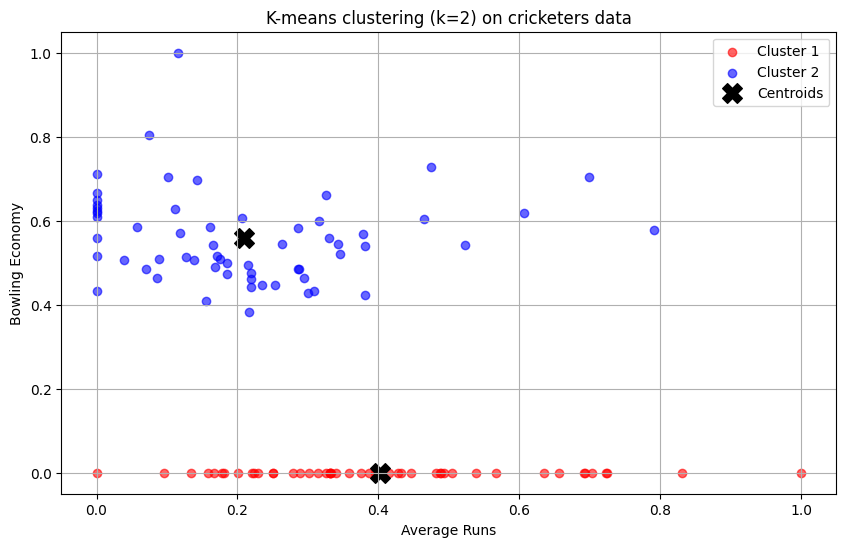

In [106]:
# # Importing required package
import matplotlib.pyplot as plt
# Converting to numpy array for processing
dataSetRead_numpy = dataSetRead_kmeans.values

# Functioning to initialize centroids randomly
def initialize_centroids(dataSetRead_numpy, k):
    np.random.seed(42)
    indices = np.random.choice(len(dataSetRead_numpy), k, replace=False)
    return dataSetRead_numpy[indices]

# Functioning to assign clusters based on the closest centroid
def assign_clusters(dataSetRead_numpy, centroids):
    distances = np.linalg.norm(dataSetRead_numpy[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

# Functioning to compute new centroids as the mean of assigned points
def compute_centroids(dataSetRead_numpy, labels, k):
    return np.array([dataSetRead_numpy[labels == i].mean(axis=0) for i in range(k)])

# K-means algorithm
def kmeans(dataSetRead_numpy, k, max_iters=100, tolerance=1e-4):
    centroids = initialize_centroids(dataSetRead_numpy, k)
    for i in range(max_iters):
        labels = assign_clusters(dataSetRead_numpy, centroids)
        new_centroids = compute_centroids(dataSetRead_numpy, labels, k)
        if np.all(np.abs(new_centroids - centroids) < tolerance):
            break
        centroids = new_centroids
    return labels, centroids

# Set number of clusters to 2
k = 2
labels, centroids = kmeans(dataSetRead_numpy, k)

# Plotting the clusters
plt.figure(figsize=(10, 6))
for cluster in range(k):
    cluster_points = dataSetRead_numpy[labels == cluster]
    color = 'red' if cluster == 0 else 'blue'
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, label=f'Cluster {cluster+1}', alpha=0.6)

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')
plt.xlabel('Average Runs')
plt.ylabel('Bowling Economy')
plt.title('K-means clustering (k=2) on cricketers data')
plt.legend()
plt.grid(True)
plt.show()

## Question 3: Redo question-2 on different values of K = 2,3,4,5. For each case, draw the plot of clusters as stated above. Visualize these plots, copy the plot diagrams in the word document,  and comment on which is better clustering (and reasons) based on visualization only. [1 points]

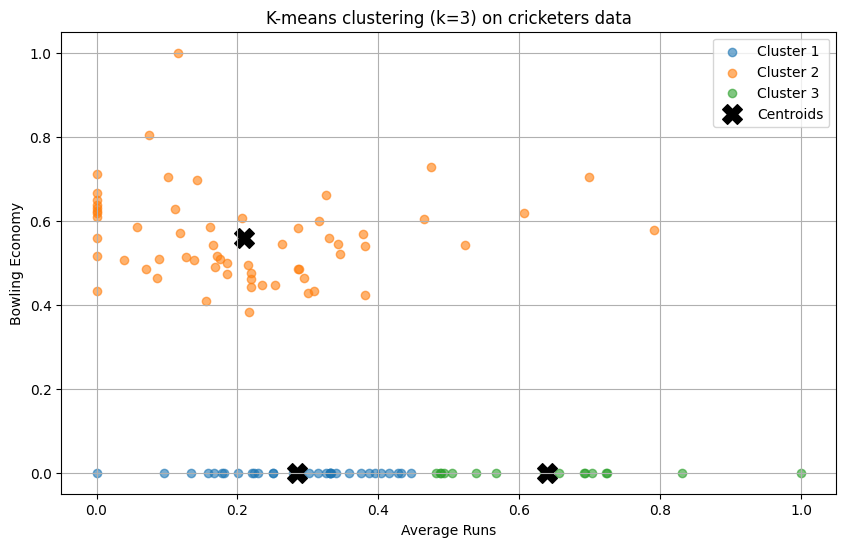

In [107]:
# Converting to numpy array for processing
dataSetRead_numpy = dataSetRead_kmeans.values

# Functioning to initialize centroids randomly
def initialize_centroids(dataSetRead_numpy, k):
    np.random.seed(42)
    indices = np.random.choice(len(dataSetRead_numpy), k, replace=False)
    return dataSetRead_numpy[indices]

# Functioning to assign clusters based on the closest centroid
def assign_clusters(dataSetRead_numpy, centroids):
    distances = np.linalg.norm(dataSetRead_numpy[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

# Functioning to compute new centroids as the mean of assigned points
def compute_centroids(dataSetRead_numpy, labels, k):
    return np.array([dataSetRead_numpy[labels == i].mean(axis=0) for i in range(k)])

# K-means algorithm
def kmeans(dataSetRead_numpy, k, max_iters=100, tolerance=1e-4):
    centroids = initialize_centroids(dataSetRead_numpy, k)
    for i in range(max_iters):
        labels = assign_clusters(dataSetRead_numpy, centroids)
        new_centroids = compute_centroids(dataSetRead_numpy, labels, k)
        if np.all(np.abs(new_centroids - centroids) < tolerance):
            break
        centroids = new_centroids
    return labels, centroids

# Set number of clusters to 3
k = 3
labels, centroids = kmeans(dataSetRead_numpy, k)

# Plotting the clusters
plt.figure(figsize=(10, 6))
for cluster in range(k):
    cluster_points = dataSetRead_numpy[labels == cluster]
    color = plt.cm.tab10(cluster)
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, label=f'Cluster {cluster+1}', alpha=0.6)

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')
plt.xlabel('Average Runs')
plt.ylabel('Bowling Economy')
plt.title('K-means clustering (k=3) on cricketers data')
plt.legend()
plt.grid(True)
plt.show()

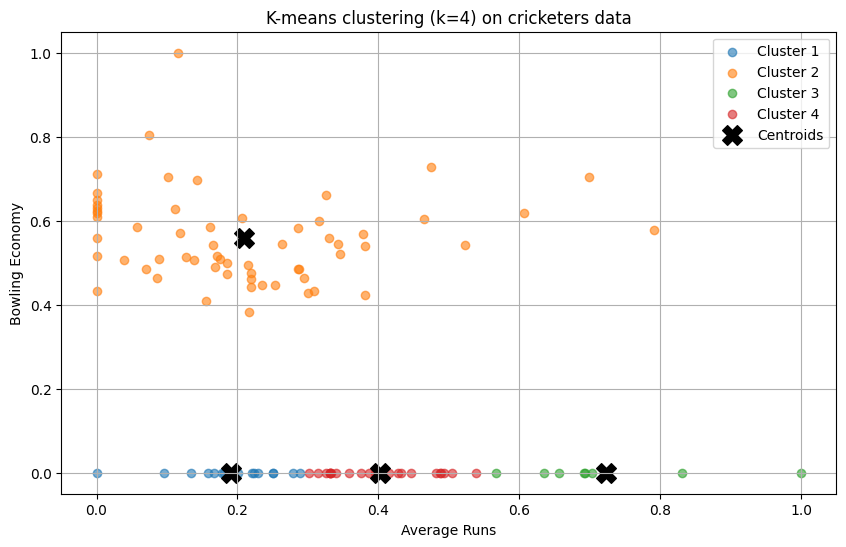

In [108]:
# Converting to numpy array for processing
dataSetRead_numpy = dataSetRead_kmeans.values

# Functioning to initialize centroids randomly
def initialize_centroids(dataSetRead_numpy, k):
    np.random.seed(42)
    indices = np.random.choice(len(dataSetRead_numpy), k, replace=False)
    return dataSetRead_numpy[indices]

# Functioning to assign clusters based on the closest centroid
def assign_clusters(dataSetRead_numpy, centroids):
    distances = np.linalg.norm(dataSetRead_numpy[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

# Functioning to compute new centroids as the mean of assigned points
def compute_centroids(dataSetRead_numpy, labels, k):
    return np.array([dataSetRead_numpy[labels == i].mean(axis=0) for i in range(k)])

# K-means algorithm
def kmeans(dataSetRead_numpy, k, max_iters=100, tolerance=1e-4):
    centroids = initialize_centroids(dataSetRead_numpy, k)
    for i in range(max_iters):
        labels = assign_clusters(dataSetRead_numpy, centroids)
        new_centroids = compute_centroids(dataSetRead_numpy, labels, k)
        if np.all(np.abs(new_centroids - centroids) < tolerance):
            break
        centroids = new_centroids
    return labels, centroids

# Set number of clusters to 4
k = 4
labels, centroids = kmeans(dataSetRead_numpy, k)

# Plotting the clusters
plt.figure(figsize=(10, 6))
for cluster in range(k):
    cluster_points = dataSetRead_numpy[labels == cluster]
    color = plt.cm.tab10(cluster)
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, label=f'Cluster {cluster+1}', alpha=0.6)

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')
plt.xlabel('Average Runs')
plt.ylabel('Bowling Economy')
plt.title('K-means clustering (k=4) on cricketers data')
plt.legend()
plt.grid(True)
plt.show()

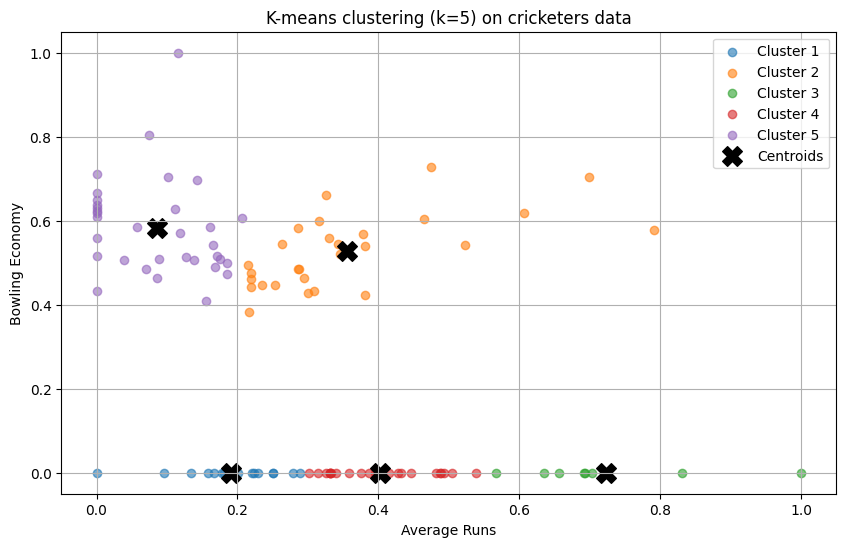

In [109]:
# Converting to numpy array for processing
dataSetRead_numpy = dataSetRead_kmeans.values

# Functioning to initialize centroids randomly
def initialize_centroids(dataSetRead_numpy, k):
    np.random.seed(42)
    indices = np.random.choice(len(dataSetRead_numpy), k, replace=False)
    return dataSetRead_numpy[indices]

# Functioning to assign clusters based on the closest centroid
def assign_clusters(dataSetRead_numpy, centroids):
    distances = np.linalg.norm(dataSetRead_numpy[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

# Functioning to compute new centroids as the mean of assigned points
def compute_centroids(dataSetRead_numpy, labels, k):
    return np.array([dataSetRead_numpy[labels == i].mean(axis=0) for i in range(k)])

# K-means algorithm
def kmeans(dataSetRead_numpy, k, max_iters=100, tolerance=1e-4):
    centroids = initialize_centroids(dataSetRead_numpy, k)
    for i in range(max_iters):
        labels = assign_clusters(dataSetRead_numpy, centroids)
        new_centroids = compute_centroids(dataSetRead_numpy, labels, k)
        if np.all(np.abs(new_centroids - centroids) < tolerance):
            break
        centroids = new_centroids
    return labels, centroids

# Set number of clusters to 5
k = 5
labels, centroids = kmeans(dataSetRead_numpy, k)

# Plotting the clusters
plt.figure(figsize=(10, 6))
for cluster in range(k):
    cluster_points = dataSetRead_numpy[labels == cluster]
    color = plt.cm.tab10(cluster)
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, label=f'Cluster {cluster+1}', alpha=0.6)

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')
plt.xlabel('Average Runs')
plt.ylabel('Bowling Economy')
plt.title('K-means clustering (k=5) on cricketers data')
plt.legend()
plt.grid(True)
plt.show()